# Fully Connected Feed-Forward Network

In this notebook we will play with Feed-Forward FC-NN (Fully Connected Neural Network) for a *classification task*: Image Classification on MNIST Dataset

**RECALL**

In the FC-NN, the output of each layer is computed using the activations from the previous one, as follows:

$$h_{i} = \sigma(W_i h_{i-1} + b_i)$$

where ${h}_i$ is the activation vector from the $i$-th layer (or the input data for $i=0$), ${W}_i$ and ${b}_i$ are  the weight matrix and the bias vector for the $i$-th layer, respectively. 
<br><rb>
$\sigma(\cdot)$ is the activation function. In our example, we will use the *ReLU* activation function for the hidden layers and *softmax* for the last layer.

To regularize the model, we will also insert a Dropout layer between consecutive hidden layers. 

Dropout works by “dropping out” some unit activations in a given layer, that is setting them to zero with a given probability.

Our loss function will be the **categorical crossentropy**.

## Model definition
Keras supports two different kind of models: the [Sequential](http://keras.io/models/#sequential) model and the [Graph](http://keras.io/models/#graph) model. The former is used to build linear stacks of layer (so each layer has one input and one output), and the latter supports any kind of connection graph.

In our case we build a Sequential model with three [Dense](http://keras.io/layers/core/#dense) (aka fully connected) layers, with some [Dropout](http://keras.io/layers/core/#dropout). Notice that the output layer has the softmax activation function. 

The resulting model is actually a `function` of its own inputs implemented using the Keras backend. 

We apply the binary crossentropy loss and choose SGD as the optimizer. 

Please remind that Keras supports a variety of different [optimizers](http://keras.io/optimizers/) and [loss functions](http://keras.io/objectives/), which you may want to check out. 

In [36]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

nb_classes = 10

from keras.datasets import mnist
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
# FC@512+relu -> DropOut(0.2) -> FC@512+relu -> DropOut(0.2) -> FC@nb_classes+softmax
# ... your Code Here

In [28]:
model = Sequential()
model.add(Dense(128, input_dim=784))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(.2))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer=SGD(), 
              metrics=['accuracy'])

In [37]:
model = Sequential()
model.add(Dense(10, input_dim=784))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer=SGD(), 
              metrics=['accuracy'])

In [35]:
network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=40, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 1s - loss: 1.2669 - acc: 0.7009 - val_loss: 0.8085 - val_acc: 0.8309
Epoch 2/40
60000/60000 [==============================] - 0s - loss: 0.7154 - acc: 0.8404 - val_loss: 0.6065 - val_acc: 0.8635
Epoch 3/40
60000/60000 [==============================] - 0s - loss: 0.5872 - acc: 0.8600 - val_loss: 0.5251 - val_acc: 0.8749
Epoch 4/40
60000/60000 [==============================] - 0s - loss: 0.5255 - acc: 0.8691 - val_loss: 0.4795 - val_acc: 0.8810
Epoch 5/40
60000/60000 [==============================] - 0s - loss: 0.4879 - acc: 0.8759 - val_loss: 0.4500 - val_acc: 0.8846
Epoch 6/40
60000/60000 [==============================] - 0s - loss: 0.4620 - acc: 0.8801 - val_loss: 0.4287 - val_acc: 0.8872
Epoch 7/40
60000/60000 [==============================] - 0s - loss: 0.4428 - acc: 0.8839 - val_loss: 0.4125 - val_acc: 0.8905
Epoch 8/40
60000/60000 [==============================] - 0s 

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 10)                7850      
_________________________________________________________________
activation_24 (Activation)   (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# %load solutions/sol_221_1.py


## Data preparation (`keras.dataset`)

We will train our model on the MNIST dataset, which consists of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. 

![](imgs/mnist.png)

Since this dataset is **provided** with Keras, we just ask the `keras.dataset` model for training and test data.

We will:

* download the data
* reshape data to be in vectorial form (original data are images)
* normalize between 0 and 1.

The `binary_crossentropy` loss expects a **one-hot-vector** as input, therefore we apply the `to_categorical` function from `keras.utilis` to convert integer labels to **one-hot-vectors**.

In [4]:
from keras.datasets import mnist
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

## Training
Having defined and compiled the model, it can be trained using the `fit` function. We also specify a validation dataset to monitor validation loss and accuracy.

In [ ]:
network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=100, verbose=1, validation_data=(X_test, Y_test))

### Plotting Network Performance Trend
The return value of the `fit` function is a `keras.callbacks.History` object which contains the entire history of training/validation loss and accuracy, for each epoch. We can therefore plot the behaviour of loss and accuracy during the training phase.

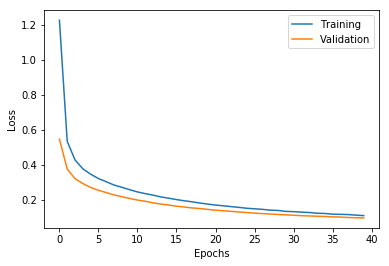

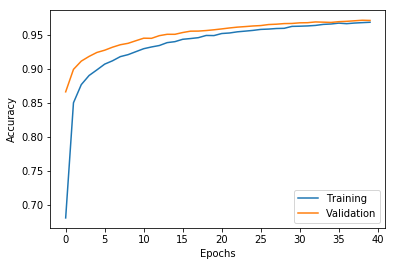

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(network_history.history['loss'])
plt.plot(network_history.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(network_history.history['acc'])
plt.plot(network_history.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

After `100` epochs, we get a `98.8%` validation accuracy. 

If you continue training, at some point the validation loss will start to increase: that is when the model starts to **overfit**. 

It is always necessary to monitor training and validation loss during the training of any kind of Neural Network, either to detect overfitting or to evaluate the behaviour of the model **(any clue on how to do it??)**

In [ ]:
# %load solutions/sol_221_2.py
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=1)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(), 
              metrics=['accuracy'])
    
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=100, 
          batch_size=128, verbose=True, callbacks=[early_stop]) 